<a href="https://colab.research.google.com/github/dheemanthAthreya/6thSem-ML-Lab/blob/main/Lab%201/1BM22CS347_Lab_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from scipy import stats

In [ ]:
# i. Load .csv file into the DataFrame
df = pd.read_csv("housing.csv")

# ii. Display information of all columns
print("Information of all columns:")
print(df.info())
print("\n")

# iii. Display statistical information of all numerical columns
print("Statistical information of all numerical columns:")
print(df.describe())
print("\n")

# iv. Display the count of unique labels for the 'Ocean Proximity' column
print("Count of unique labels for 'Ocean Proximity' column:")
print(df['ocean_proximity'].value_counts())
print("\n")

# v. Display which attributes (columns) have missing values count greater than zero
print("Columns with missing values count greater than zero:")
print(df.isnull().sum()[df.isnull().sum() > 0])


Information of all columns:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  int64  
 3   total_rooms         20640 non-null  int64  
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  int64  
 6   households          20640 non-null  int64  
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  int64  
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(4), int64(5), object(1)
memory usage: 1.6+ MB
None


Statistical information of all numerical columns:
          longitude      latitude  housing_median_age   total_rooms  \
count  20640.000000  20640.000000        20640.000000  20640.000000   
mean    -119.5

# Diabetes Dataset

In [ ]:
df_diabetes = pd.read_csv('Dataset_of_Diabetes.csv')

df_diabetes.head()

,ID,No_Pation,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
0,502,17975,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
1,735,34221,M,26,4.5,62,4.9,3.7,1.4,1.1,2.1,0.6,23.0,N
2,420,47975,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
3,680,87656,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
4,504,34223,M,33,7.1,46,4.9,4.9,1.0,0.8,2.0,0.4,21.0,N


In [ ]:
df_diabetes.describe()

,ID,No_Pation,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI
count,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,340.500000,2.705514e+05,53.528000,5.124743,68.943000,8.281160,4.862820,2.349610,1.204750,2.609790,1.854700,29.578020
std,240.397673,3.380758e+06,8.799241,2.935165,59.984747,2.534003,1.301738,1.401176,0.660414,1.115102,3.663599,4.962388
min,1.000000,1.230000e+02,20.000000,0.500000,6.000000,0.900000,0.000000,0.300000,0.200000,0.300000,0.100000,19.000000
25%,125.750000,2.406375e+04,51.000000,3.700000,48.000000,6.500000,4.000000,1.500000,0.900000,1.800000,0.700000,26.000000
50%,300.500000,3.439550e+04,55.000000,4.600000,60.000000,8.000000,4.800000,2.000000,1.100000,2.500000,0.900000,30.000000
75%,550.250000,4.538425e+04,59.000000,5.700000,73.000000,10.200000,5.600000,2.900000,1.300000,3.300000,1.500000,33.000000
max,800.000000,7.543566e+07,79.000000,38.900000,800.000000,16.000000,10.300000,13.800000,9.900000,9.900000,35.000000,47.750000


In [ ]:
df_diabetes.isnull().sum()

,0
ID,0
No_Pation,0
Gender,0
AGE,0
Urea,0
Cr,0
HbA1c,0
Chol,0
TG,0
HDL,0


In [ ]:
df_copy = df_diabetes.copy()

# Initialize OrdinalEncoder
ordinal_encoder = OrdinalEncoder(categories=[["M", "F"]])
# Fit and transform the data
df_copy["Gender"] = df_copy["Gender"].str.upper()
df_copy["Gender"] = ordinal_encoder.fit_transform(df_copy[["Gender"]])

# Initialize OneHotEncoder
onehot_encoder = OneHotEncoder()

# Fit and transform the "City" column
encoded_data = onehot_encoder.fit_transform(df_diabetes[["CLASS"]])

# Convert the sparse matrix to a dense array
encoded_array = encoded_data.toarray()

# Convert to DataFrame for better visualization
encoded_df = pd.DataFrame(encoded_array, columns=onehot_encoder.get_feature_names_out(["CLASS"]))
df_encoded = pd.concat([df_copy, encoded_df], axis=1)

df_encoded.drop("Gender", axis=1, inplace=True)
df_encoded.drop("CLASS", axis=1, inplace=True)

print(df_encoded. head())

    ID  No_Pation  AGE  Urea  Cr  HbA1c  Chol   TG  HDL  LDL  VLDL   BMI  \
0  502      17975   50   4.7  46    4.9   4.2  0.9  2.4  1.4   0.5  24.0   
1  735      34221   26   4.5  62    4.9   3.7  1.4  1.1  2.1   0.6  23.0   
2  420      47975   50   4.7  46    4.9   4.2  0.9  2.4  1.4   0.5  24.0   
3  680      87656   50   4.7  46    4.9   4.2  0.9  2.4  1.4   0.5  24.0   
4  504      34223   33   7.1  46    4.9   4.9  1.0  0.8  2.0   0.4  21.0   

   CLASS_N  CLASS_N   CLASS_P  CLASS_Y  CLASS_Y   
0      1.0       0.0      0.0      0.0       0.0  
1      1.0       0.0      0.0      0.0       0.0  
2      1.0       0.0      0.0      0.0       0.0  
3      1.0       0.0      0.0      0.0       0.0  
4      1.0       0.0      0.0      0.0       0.0  


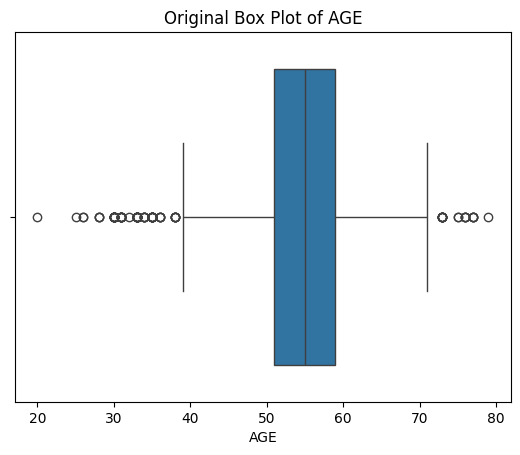

Total outliers detected in AGE using IQR: 98


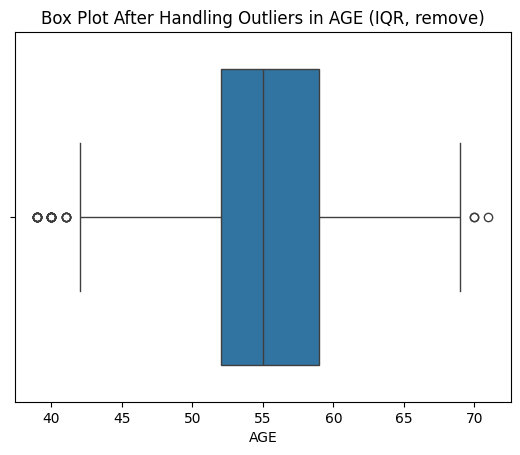

In [ ]:

def handle_outliers(df, column, method="IQR", action="remove"):
    """
    Detects and handles outliers in a column using IQR or Z-score.

    Parameters:
        df (pd.DataFrame): The input DataFrame.
        column (str): The column to process.
        method (str): "IQR" for IQR-based outlier detection, "Z-score" for Z-score-based detection.
        action (str): "remove" to drop outliers, "replace" to replace them with the median.

    Returns:
        pd.DataFrame: DataFrame after outlier handling.
    """

    df_copy = df.copy()  # Work on a copy to avoid modifying the original DataFrame

    # Plot Original Boxplot
    sns.boxplot(x=df_copy[column])
    plt.title(f'Original Box Plot of {column}')
    plt.show()

    if method == "IQR":
        # Compute IQR
        Q1 = df_copy[column].quantile(0.25)
        Q3 = df_copy[column].quantile(0.75)
        IQR = Q3 - Q1

        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Detect outliers
        outliers = (df_copy[column] < lower_bound) | (df_copy[column] > upper_bound)

    elif method == "Z-score":
        # Compute Z-score
        df_copy["Z_score"] = zscore(df_copy[column])

        # Detect outliers (Z-score threshold = 3)
        outliers = np.abs(df_copy["Z_score"]) > 3

    else:
        raise ValueError("Invalid method! Use 'IQR' or 'Z-score'.")

    print(f"Total outliers detected in {column} using {method}: {outliers.sum()}")

    if action == "remove":
        # Remove Outliers
        df_cleaned = df_copy[~outliers].drop(columns=["Z_score"], errors="ignore")

    elif action == "replace":
        # Replace Outliers with Median
        median_value = df_copy[column].median()
        df_copy.loc[outliers, column] = median_value
        df_cleaned = df_copy.drop(columns=["Z_score"], errors="ignore")

    else:
        raise ValueError("Invalid action! Use 'remove' or 'replace'.")

    # Plot Boxplot After Outlier Handling
    sns.boxplot(x=df_cleaned[column])
    plt.title(f'Box Plot After Handling Outliers in {column} ({method}, {action})')
    plt.show()

    return df_cleaned

# Example Usage:
df_cleaned = handle_outliers(df_diabetes, 'AGE', method="IQR", action="remove")  # Use "remove" to drop outliers


In [ ]:
def scale_data(df, column, method="min-max"):
    """
    Scales a column using Min-Max Scaling (Normalization) or Standardization (Z-score).

    Parameters:
        df (pd.DataFrame): The input DataFrame.
        column (str): The column to scale.
        method (str): "min-max" for Min-Max Scaling, "z-score" for Standardization.

    Returns:
        pd.DataFrame: DataFrame with the scaled column.
    """

    df_copy = df.copy()  # Avoid modifying the original DataFrame

    if method == "min-max":
        scaler = MinMaxScaler()
        df_copy[column + "_scaled"] = scaler.fit_transform(df_copy[[column]])

    elif method == "z-score":
        scaler = StandardScaler()
        df_copy[column + "_scaled"] = scaler.fit_transform(df_copy[[column]])

    else:
        raise ValueError("Invalid method! Use 'min-max' or 'z-score'.")

    print(f"{method.title()} scaling applied to '{column}' successfully!")
    return df_copy

# Example Usage:
df_scaled = scale_data(df_diabetes, 'AGE', method="min-max")  # Use "z-score" for standardization


Min-Max scaling applied to 'AGE' successfully!


# Adult Income Dataset

In [ ]:
# Load Adult Income Dataset
adult_df = pd.read_csv("adult.csv")
print("Adult Income Dataset Loaded")
print(adult_df.head())

# -------------------- Data Preprocessing for Adult Income Dataset --------------------
# 1. Handling Missing Values in Adult Income Dataset
# Impute missing values for numerical columns with mean and categorical with most frequent value
numerical_cols_adult = adult_df.select_dtypes(include=[np.number]).columns
categorical_cols_adult = adult_df.select_dtypes(include=['object']).columns

# Impute missing values for numerical columns (mean strategy)
num_imputer_adult = SimpleImputer(strategy='mean')
adult_df[numerical_cols_adult] = num_imputer_adult.fit_transform(adult_df[numerical_cols_adult])

# Impute missing values for categorical columns (most frequent strategy)
cat_imputer_adult = SimpleImputer(strategy='most_frequent')
adult_df[categorical_cols_adult] = cat_imputer_adult.fit_transform(adult_df[categorical_cols_adult])

# 2. Handling Categorical Data (Label Encoding for categorical columns)
label_encoder = LabelEncoder()
for col in categorical_cols_adult:
    adult_df[col] = label_encoder.fit_transform(adult_df[col])

# 3. Handling Outliers in Adult Income Dataset
# Removing outliers based on Z-score (values beyond 3 standard deviations)
z_scores_adult = np.abs(stats.zscore(adult_df[numerical_cols_adult]))
outliers_adult = (z_scores_adult > 3).all(axis=1)
adult_df_cleaned = adult_df[~outliers_adult]

# -------------------- Data Transformation (Normalization and Scaling) --------------------
# 1. Min-Max Scaling (Normalization)
min_max_scaler_adult = MinMaxScaler()
adult_df_scaled = pd.DataFrame(min_max_scaler_adult.fit_transform(adult_df_cleaned), columns=adult_df_cleaned.columns)

# 2. Standard Scaling (Z-Score Normalization)
standard_scaler_adult = StandardScaler()
adult_df_standardized = pd.DataFrame(standard_scaler_adult.fit_transform(adult_df_cleaned), columns=adult_df_cleaned.columns)

# Display results
print("\nProcessed Adult Income Data (after preprocessing):")
print(adult_df_standardized.head())

Adult Income Dataset Loaded
   age  workclass  fnlwgt     education  educational-num      marital-status  \
0   25    Private  226802          11th                7       Never-married   
1   38    Private   89814       HS-grad                9  Married-civ-spouse   
2   28  Local-gov  336951    Assoc-acdm               12  Married-civ-spouse   
3   44    Private  160323  Some-college               10  Married-civ-spouse   
4   18          ?  103497  Some-college               10       Never-married   

          occupation relationship   race  gender  capital-gain  capital-loss  \
0  Machine-op-inspct    Own-child  Black    Male             0             0   
1    Farming-fishing      Husband  White    Male             0             0   
2    Protective-serv      Husband  White    Male             0             0   
3  Machine-op-inspct      Husband  Black    Male          7688             0   
4                  ?    Own-child  White  Female             0             0   

   hours-p